## Import needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score

### Install openyx1 for reading excel file

In [2]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 34.5 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Reading and Showing the Uncleaned Dataset

In [3]:
df = pd.read_excel('UsedCarsSA_Unclean_Ar.xlsx')
df

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,مستعملة,103000,الرياض,114000
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,مستعملة,5448,الرياض,على السوم
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,مستعملة,72418,الرياض,27500
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,مستعملة,114154,الرياض,43000
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,مستعملة,41912,الرياض,59500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,اودي,A6,2015,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,مستعملة,77000,الرياض,75000
8244,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,شفروليه,كمارو,2010,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,مستعملة,150000,الرياض,53000
8245,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,تويوتا,لاندكروزر,2013,خليجي,أبيض,فل,NaN,بنزين,اوتوماتيك,مستعملة,260,نجران,على السوم
8246,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,نيسان,التيما,2011,سعودي,سلفر,فل,2.5,بنزين,اوتوماتيك,مستعملة,18500,عسير,22000


In [4]:
df.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,مستعملة,103000,الرياض,114000
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,مستعملة,5448,الرياض,على السوم
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,مستعملة,72418,الرياض,27500
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,مستعملة,114154,الرياض,43000
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,مستعملة,41912,الرياض,59500


In [5]:
df.tail()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price
8243,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,اودي,A6,2015,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,مستعملة,77000,الرياض,75000
8244,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,شفروليه,كمارو,2010,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,مستعملة,150000,الرياض,53000
8245,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,تويوتا,لاندكروزر,2013,خليجي,أبيض,فل,NaN,بنزين,اوتوماتيك,مستعملة,260,نجران,على السوم
8246,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,نيسان,التيما,2011,سعودي,سلفر,فل,2.5,بنزين,اوتوماتيك,مستعملة,18500,عسير,22000
8247,https://syarah.com/%D9%83%D8%A7%D8%AF%D9%8A%D9...,كاديلاك,أخرى,2013,سعودي,أبيض,فل,3.6,بنزين,اوتوماتيك,مستعملة,256000,المدينة,40000


In [6]:
df.shape

(8248, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 902.2+ KB


In [8]:
df.describe()

,Year,Engine_Size,Mileage
count,8248.000000,5982.000000,8.248000e+03
mean,2014.014064,3.175794,1.494128e+05
std,5.935349,1.567480,3.455258e+05
min,1936.000000,1.000000,1.000000e+02
25%,2012.000000,2.000000,3.700000e+04
50%,2016.000000,2.700000,1.016575e+05
75%,2018.000000,4.000000,1.955520e+05
max,2022.000000,9.000000,2.000000e+07


In [9]:
df.isna().sum()

Link              0
Make              0
Type              0
Year              0
Origin           95
Color             0
Options         109
Engine_Size    2266
Fuel_Type         0
Gear_Type        74
Condition         0
Mileage           0
Region            0
Price             0
dtype: int64

In [10]:
df[df.isna()]

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.duplicated().sum()

20

## Reading and Showing the Cleaned Dataset (After ALtryx)

In [12]:
df_cleaned = pd.read_excel('UsedCarsSA_clean_Ar.xlsx')
df_cleaned

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,اخرى,أخرى,1992,سعودي,أبيض,نص فل,2.2,بنزين,عادي,120000,مكة,4833.333333
1,اخرى,أخرى,2007,سعودي,أحمر,ستاندر,3.5,بنزين,عادي,125,القصيم,4833.333333
2,اخرى,أخرى,2009,سعودي,أسود,فل,1.0,بنزين,اوتوماتيك,218000,الرياض,4833.333333
3,اخرى,أخرى,2011,اخرى,أسود,فل,1.8,بنزين,عادي,33000,المدينة,4833.333333
4,اخرى,أخرى,2012,اخرى,ازرق,فل,2.4,بنزين,اوتوماتيك,150,جازان,4833.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
7934,هونداي,كونا,2020,سعودي,أبيض,فل,2.0,بنزين,اوتوماتيك,3109,الرياض,21884.410628
7935,هونداي,كونا,2020,سعودي,أبيض,نص فل,2.0,بنزين,اوتوماتيك,21000,الرياض,21884.410628
7936,هونداي,كونا,2020,سعودي,ازرق,فل,2.0,بنزين,اوتوماتيك,32000,الرياض,21884.410628
7937,هونداي,كونا,2020,سعودي,رمادي,نص فل,2.0,بنزين,اوتوماتيك,30271,الرياض,21884.410628


In [13]:
df_cleaned.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,اخرى,أخرى,1992,سعودي,أبيض,نص فل,2.2,بنزين,عادي,120000,مكة,4833.333333
1,اخرى,أخرى,2007,سعودي,أحمر,ستاندر,3.5,بنزين,عادي,125,القصيم,4833.333333
2,اخرى,أخرى,2009,سعودي,أسود,فل,1.0,بنزين,اوتوماتيك,218000,الرياض,4833.333333
3,اخرى,أخرى,2011,اخرى,أسود,فل,1.8,بنزين,عادي,33000,المدينة,4833.333333
4,اخرى,أخرى,2012,اخرى,ازرق,فل,2.4,بنزين,اوتوماتيك,150,جازان,4833.333333


In [14]:
df_cleaned.tail()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
7934,هونداي,كونا,2020,سعودي,أبيض,فل,2.0,بنزين,اوتوماتيك,3109,الرياض,21884.410628
7935,هونداي,كونا,2020,سعودي,أبيض,نص فل,2.0,بنزين,اوتوماتيك,21000,الرياض,21884.410628
7936,هونداي,كونا,2020,سعودي,ازرق,فل,2.0,بنزين,اوتوماتيك,32000,الرياض,21884.410628
7937,هونداي,كونا,2020,سعودي,رمادي,نص فل,2.0,بنزين,اوتوماتيك,30271,الرياض,21884.410628
7938,هونداي,كونا,2020,سعودي,سلفر,ستاندر,2.0,بنزين,اوتوماتيك,6400,المدينة,21884.410628


In [15]:
df_cleaned.shape

(7939, 12)

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         7939 non-null   object 
 1   Type         7939 non-null   object 
 2   Year         7939 non-null   int64  
 3   Origin       7939 non-null   object 
 4   Color        7939 non-null   object 
 5   Options      7939 non-null   object 
 6   Engine_Size  7939 non-null   float64
 7   Fuel_Type    7939 non-null   object 
 8   Gear_Type    7939 non-null   object 
 9   Mileage      7939 non-null   int64  
 10  Region       7939 non-null   object 
 11  Price        7939 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 744.4+ KB


In [17]:
df_cleaned.describe()

,Year,Engine_Size,Mileage,Price
count,7939.000000,7939.000000,7.939000e+03,7939.000000
mean,2014.009447,3.317131,1.492431e+05,20378.469773
std,5.826373,1.509311,3.315813e+05,2756.545219
min,1936.000000,1.000000,1.000000e+02,500.000000
25%,2012.000000,2.000000,3.700000e+04,19039.417391
50%,2016.000000,3.000000,1.030000e+05,20434.860697
75%,2018.000000,4.500000,1.970000e+05,21884.410628
max,2022.000000,9.000000,2.000000e+07,31000.000000


In [18]:
df_cleaned.isna().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
dtype: int64

In [19]:
df_cleaned.duplicated().sum()

0

### Change the type of string coulmns to str

In [20]:
df_cleaned.Make.unique()

array(['اخرى', 'استون مارتن', 'ام جي', 'انفنتي', 'اودي', 'بنتلي', 'بورش',
       'بونتياك', 'بي ام دبليو', 'بي واي دي', 'بيجو', 'تويوتا', 'جاغوار',
       'جريت وول', 'جنجو', 'جي أيه سي', 'جي إم سي', 'جيب', 'جيلي',
       'جينيسيس', 'دايهاتسو', 'دودج', 'رولز رویس', 'رينو', 'سكودا',
       'سوبارو', 'سوزوكي', 'شانجان', 'شفروليه', 'شيري', 'فاو',
       'فكتوريا اوتو', 'فوتون', 'فورد', 'فولكسفاغن', 'فيات', 'فيراري',
       'كاديلاك', 'كرايسلر', 'كلاسيكية', 'كيا', 'لاند روفر', 'لكزس',
       'ليفان', 'لينكولن', 'مازدا', 'مازيراتي', 'مرسيدس', 'ميتسوبيشي',
       'ميركوري', 'ميني', 'نيسان', 'هافال', 'همر', 'هوندا', 'هونداي'],
      dtype=object)

In [21]:
df_cleaned.Type.unique()

array(['أخرى', 'دي بي 9', 'فانكويش', 'ڤانتج', '3', '350', '360', '5', '6',
       'GS', 'HS', 'RX5', 'RX8', 'ZS', 'FX', 'G', 'M', 'Q', 'QX', 'A3',
       'A4', 'A5', 'A6', 'A7', 'A8', 'Q5', 'Q7', 'S5', 'S8', 'آرنايج',
       'بينتايجا', 'فلاينج سبير', 'كونتيننتال', '911', 'باناميرا',
       'كايمان', 'كاين', 'كاين اس', 'كايين توربو', 'كايين توربو اس',
       'كايين جي تي اس', 'ماكان', 'بونفيل', 'الفئة M', 'الفئة X',
       'الفئة Z', 'الفئة الأولى', 'الفئة الثالثة', 'الفئة الخامسة',
       'الفئة الرابعة', 'الفئة السابعة', 'الفئة السادسة', 'F3', 'S6',
       'S7', '3008', '301', '307', '308', '5008', 'بارتنر', '4Runner',
       'C-HR', 'اف جي', 'افالون', 'افانزا', 'اوريون', 'ايكو', 'اينوفا',
       'برادو', 'بريفيا', 'تندرا', 'تويوتا 86', 'دينا', 'راش', 'راف فور',
       'ربع', 'سيكويا', 'سيينا LE', 'شاص', 'فورتشنر', 'كامري', 'كراون',
       'كرسيدا', 'كورولا', 'كورولا كروس', 'كوستر', 'لاندكروزر', 'هايس',
       'هايلكس', 'يارس', 'F-Pace', 'اس تايب', 'اف تايب', 'اكس اف',
       'اكس جي

In [22]:
df_cleaned.Origin.unique()

array(['سعودي', 'اخرى', 'خليجي'], dtype=object)

In [23]:
df_cleaned.Color.unique()

array(['أبيض', 'أحمر', 'أسود', 'ازرق', 'بني', 'أصفر', 'برونزي', 'لون آخر',
       'رمادي', 'ذهبي', 'سلفر', 'زيتي', 'كحلي', 'أخضر', 'برتقالي'],
      dtype=object)

In [24]:
df_cleaned.Options.unique()

array(['نص فل', 'ستاندر', 'فل'], dtype=object)

In [25]:
df_cleaned.Fuel_Type.unique()

array(['بنزين'], dtype=object)

In [26]:
df_cleaned.Gear_Type.unique()

array(['عادي', 'اوتوماتيك'], dtype=object)

In [27]:
df_cleaned.Region.unique()

array(['مكة', 'القصيم', 'الرياض', 'المدينة', 'جازان', 'الشرقية', 'الباحة',
       'تبوك', 'عسير', 'الجوف', 'حائل', 'نجران', 'الحدود الشمالية'],
      dtype=object)

In [28]:
#df_cleaned = df_cleaned.convert_dtypes()
#df_cleaned.dtypes

### Handle the outliers

In [29]:
df_cleaned.describe()

,Year,Engine_Size,Mileage,Price
count,7939.000000,7939.000000,7.939000e+03,7939.000000
mean,2014.009447,3.317131,1.492431e+05,20378.469773
std,5.826373,1.509311,3.315813e+05,2756.545219
min,1936.000000,1.000000,1.000000e+02,500.000000
25%,2012.000000,2.000000,3.700000e+04,19039.417391
50%,2016.000000,3.000000,1.030000e+05,20434.860697
75%,2018.000000,4.500000,1.970000e+05,21884.410628
max,2022.000000,9.000000,2.000000e+07,31000.000000


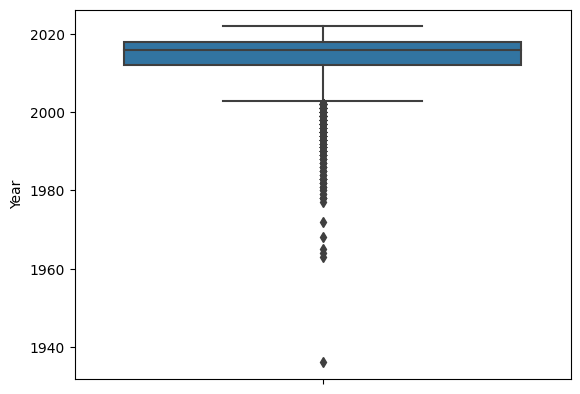

In [30]:
sns.boxplot(y=df_cleaned['Year'])
plt.show()

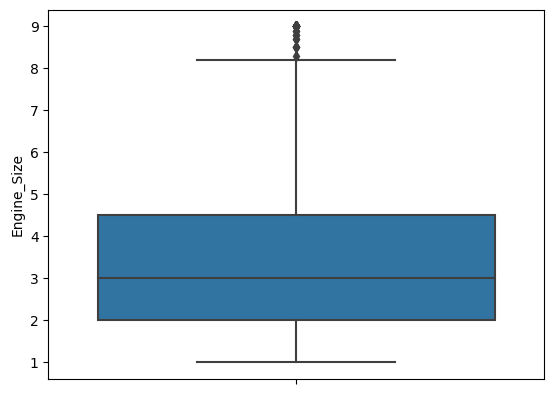

In [31]:
sns.boxplot(y=df_cleaned['Engine_Size'])
plt.show()

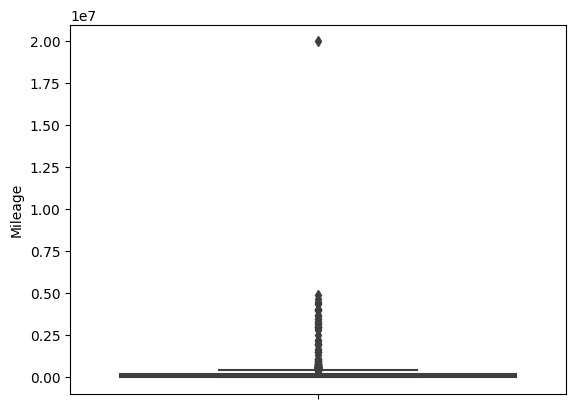

In [32]:
sns.boxplot(y=df_cleaned['Mileage'])
plt.show()

In [33]:
Q1 = df_cleaned['Mileage'].quantile(0.25)
Q3 = df_cleaned['Mileage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_cleaned[(df_cleaned['Mileage'] >= lower_bound) & (df_cleaned['Mileage'] <= upper_bound)]

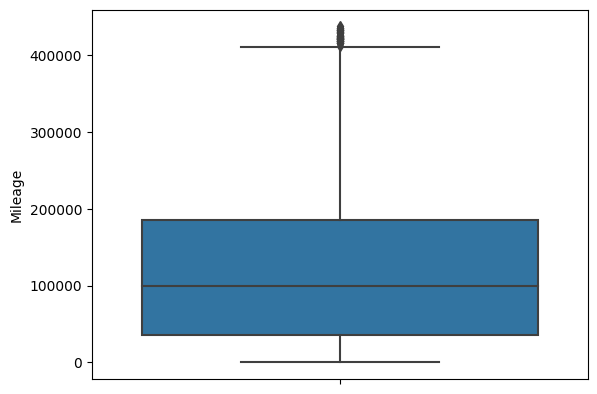

In [34]:
sns.boxplot(y=df_cleaned['Mileage'])
plt.show()

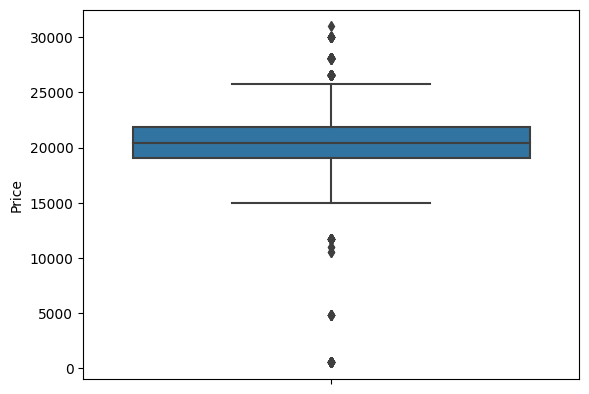

In [35]:
sns.boxplot(y=df_cleaned['Price'])
plt.show()

In [36]:
Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_cleaned[(df_cleaned['Price'] >= lower_bound) & (df_cleaned['Price'] <= upper_bound)]

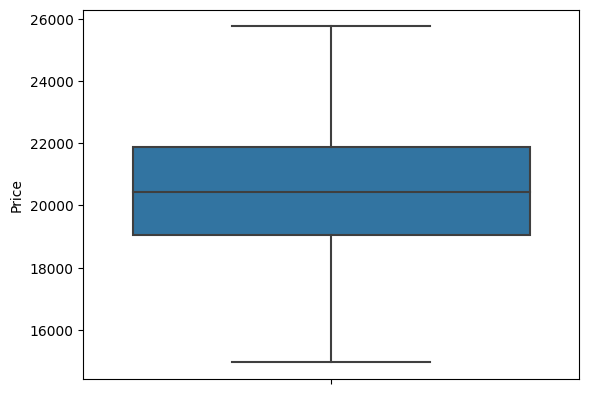

In [37]:
sns.boxplot(y=df_cleaned['Price'])
plt.show()

# Data Analysis

*Notes*:
1- we have to chosse specific style and colors
2- change the fonts size of labels

In [38]:
x = ["#e27c7c", "#a86464", "#6d4b4b", "#503f3f", "#333333", "#3c4e4b", "#466964", "#599e94", "#6cd4c5"]
c= ['#04afaf','#0ba8a8','#12a1a1','#199a9a', '#1f9494','#268d8d','#2d8686','#347f7f','#3b7878','#427171','#496a6a','#506363','#575c5c']

### Chart 1 - Mileage and price

In [39]:
pio.templates.default = "ggplot2"

In [40]:

fig1 = px.histogram(df_cleaned, x='Mileage', y='Price', title='عدد الأميال والسعر')
fig1.update_xaxes(title='ممشى السيارة', title_font=dict(size=18), tickfont=dict(size=14))
fig1.update_yaxes(title='السعر',title_font=dict(size=18), tickfont=dict(size=14))
fig1.update_layout(title_font=dict(size=25))
fig1.show()

### Chart 2 - The number of miles in each area

In [41]:
region_counts = df_cleaned['Region'].value_counts()
fig2 = px.pie(region_counts, values='Region', names=region_counts.index, hole=0.4, width=800, height=600, title='توزيع الأميال في كل منطقة')
fig2.update_layout(title_font=dict(size=25))
fig2.show()

### Chart 3 - Top 5 companies in calculating the average number of miles

In [42]:
data = df_cleaned.groupby(['Make', 'Type'])['Mileage'].mean().reset_index()
data = data.sort_values(by='Mileage', ascending=False)
top_make = data.groupby('Make').head(1).nlargest(5, 'Mileage')
top_type = data[data['Make'].isin(top_make['Make'])].groupby('Make').head(5)
fig3 = px.sunburst(top_type, path=['Make', 'Type'], values='Mileage',
                 title='اكبر 5 شركات في حساب متوسط عدد الميل')
                 
fig3.update_layout(title_font=dict(size=25))
fig3.show()

### Chart 4 - The price of the car color in each region

In [43]:
fig4 = px.scatter(df_cleaned, x='Color', y='Region', size='Price',
                  title='سعر لون السيارة في كل منطقة',
                  color='Price',
                  labels={'Color': 'لون السيارة', 'Region': 'المنطقة', 'Price': 'سعر السيارة'})

fig4.update_layout(
    title_font=dict(size=20),
    font=dict(size=14)
)
fig4.update_xaxes(categoryorder='total ascending')
fig4.show()

### Chart 5 - The price depends on the size of the machine

In [44]:
fig5 = px.histogram(df_cleaned, x='Engine_Size', y='Price', title='مجموع الاسعار حسب حجم المكينة')
fig5.update_xaxes(title='حجم المكينة',title_font=dict(size=18), tickfont=dict(size=14))
fig5.update_yaxes(title='السعر',title_font=dict(size=18), tickfont=dict(size=14))
fig5.update_layout(title_font=dict(size=25))
fig5.show()

## ML

= Supervised
  Regrission (the value of the prediction is number)
   Linear Regression - Decision Tree - Random Forest - Elastic Net Regression

### Transfer the strings to numbers

In [45]:
# encoder = OneHotEncoder()

# categorical_columns = ['Make', 'Type', 'Origin', 'Color', 'Options', 'Fuel_Type', 'Gear_Type', 'Region']
# df_categorical = df_cleaned[categorical_columns]
# encoded_columns = encoder.fit_transform(df_categorical)
# encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names(categorical_columns))
# df_x = df_cleaned.drop(columns=categorical_columns)
# df_combined = pd.concat([df_x, encoded_df], axis=1)
# df_combined

In [46]:


encoder = LabelEncoder()

categorical_columns = ['Make', 'Type', 'Origin', 'Color', 'Options', 'Fuel_Type', 'Gear_Type', 'Region']
df_categorical = df_cleaned[categorical_columns].astype(str)  # Convert the categorical columns to string type

for column in df_categorical.columns:
    df_categorical[column] = encoder.fit_transform(df_categorical[column])  # Encode the categorical columns

df_combined = pd.concat([df_cleaned.drop(columns=categorical_columns), df_categorical], axis=1)  
df_combined

,Year,Engine_Size,Mileage,Price,Make,Type,Origin,Color,Options,Fuel_Type,Gear_Type,Region
9,2010,6.0,71000,19039.417391,0,216,2,7,1,0,0,4
10,2013,6.0,32000,19039.417391,0,264,2,14,1,0,0,4
11,2008,6.0,18000,22500.000000,0,355,2,0,1,0,0,3
12,2012,6.0,880,22500.000000,0,355,2,5,1,0,1,4
45,2007,3.5,170,17500.000000,1,43,1,8,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
7934,2020,2.0,3109,21884.410628,44,319,2,0,1,0,0,3
7935,2020,2.0,21000,21884.410628,44,319,2,0,2,0,0,3
7936,2020,2.0,32000,21884.410628,44,319,2,5,1,0,0,3
7937,2020,2.0,30271,21884.410628,44,319,2,10,2,0,0,3


In [47]:
df_combined

,Year,Engine_Size,Mileage,Price,Make,Type,Origin,Color,Options,Fuel_Type,Gear_Type,Region
9,2010,6.0,71000,19039.417391,0,216,2,7,1,0,0,4
10,2013,6.0,32000,19039.417391,0,264,2,14,1,0,0,4
11,2008,6.0,18000,22500.000000,0,355,2,0,1,0,0,3
12,2012,6.0,880,22500.000000,0,355,2,5,1,0,1,4
45,2007,3.5,170,17500.000000,1,43,1,8,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
7934,2020,2.0,3109,21884.410628,44,319,2,0,1,0,0,3
7935,2020,2.0,21000,21884.410628,44,319,2,0,2,0,0,3
7936,2020,2.0,32000,21884.410628,44,319,2,5,1,0,0,3
7937,2020,2.0,30271,21884.410628,44,319,2,10,2,0,0,3


### Find the feature columns

In [48]:
df_combined.dtypes

Year             int64
Engine_Size    float64
Mileage          int64
Price          float64
Make             int64
Type             int64
Origin           int64
Color            int64
Options          int64
Fuel_Type        int64
Gear_Type        int64
Region           int64
dtype: object

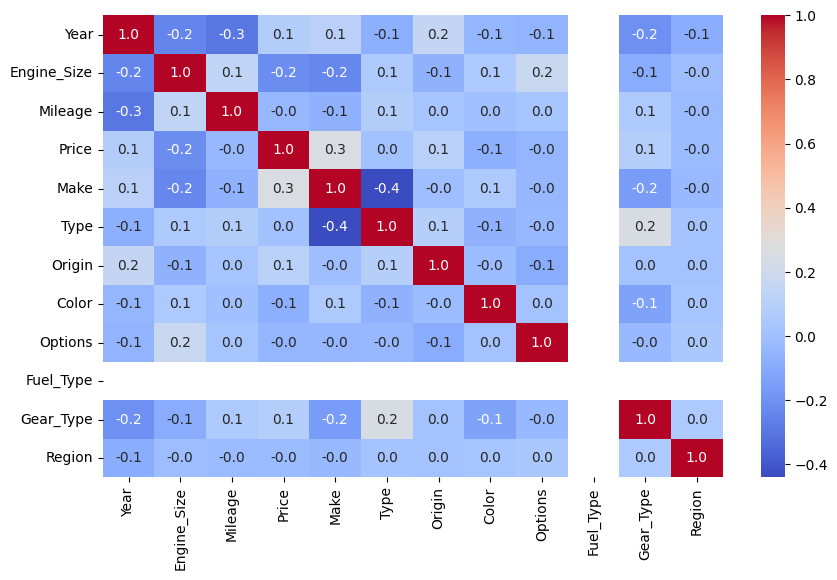

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df_combined.corr(), annot=True, fmt=".1f",cmap='coolwarm')
plt.show()

### Splitting method

In [50]:
from sklearn.model_selection import train_test_split

X = df_combined.drop(columns=['Mileage'])
y = df_combined['Mileage']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML Algorithems

## Linear Regression

In [52]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

### evaluation metrics

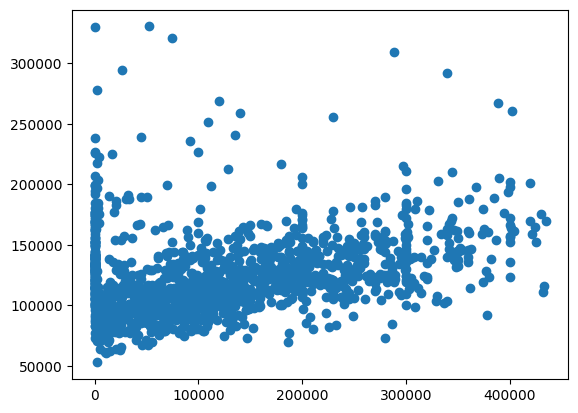

In [53]:
# compare between predictions and real values
lrm_predictions = linear_reg_model.predict(X_test)
lrm_real_values = np.array(y_test)

plt.scatter(lrm_real_values, lrm_predictions);

In [54]:
lrm_MAE = metrics.mean_absolute_error(y_test, lrm_predictions)
print('MAE:', lrm_MAE)
lrm_MSE = metrics.mean_squared_error(y_test, lrm_predictions)
print('MSE:', lrm_MSE)
lrm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, lrm_predictions))
print('RMSE:', lrm_RMSE)
lrm_R2 = r2_score(y_test, lrm_predictions)
print('R^2:', lrm_R2)

MAE: 78038.4100897961
MSE: 9821803019.693642
RMSE: 99105.01006353635
R^2: 0.10054059242182578


- Since MSE, MAE and RMSE is too high the model will gives a bad predictions.
- Since R^2 is negative the Linear Regressom is not good model for the data.

## Decision Tree

In [55]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)


DecisionTreeRegressor()

### evaluation metrics

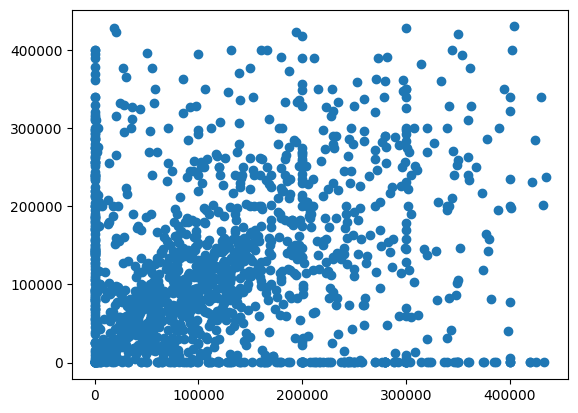

In [56]:
# compare between predictions and real values
dtr_predictions = decision_tree_model.predict(X_test)
dtr_real_values = np.array(y_test)

plt.scatter(dtr_real_values, dtr_predictions);

In [57]:
dtr_MAE = metrics.mean_absolute_error(y_test, dtr_predictions)
print('MAE:', dtr_MAE)
dtr_MSE = metrics.mean_squared_error(y_test, dtr_predictions)
print('MSE:', dtr_MSE)
dtr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, dtr_predictions))
print('RMSE:', dtr_RMSE)
dtr_R2 = r2_score(y_test, dtr_predictions)
print('R^2:', dtr_R2)

MAE: 89250.64799182706
MSE: 16586013459.163017
RMSE: 128786.69752409609
R^2: -0.5189111215272288


## Random Forest

In [58]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)


RandomForestRegressor()

### evaluation metrics

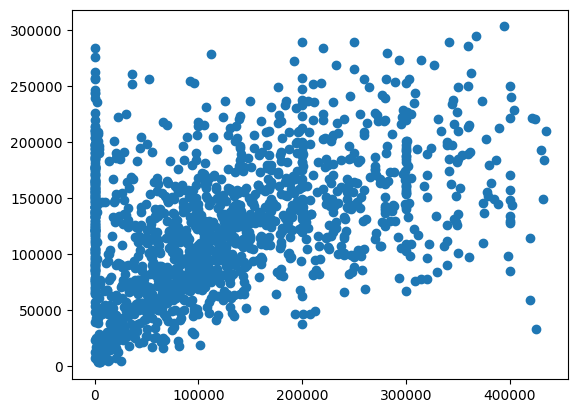

In [59]:
# compare between predictions and real values
rfm_predictions = random_forest_model.predict(X_test)
rfm_real_values = np.array(y_test)

plt.scatter(rfm_real_values, rfm_predictions);

In [60]:
rfm_MAE = metrics.mean_absolute_error(y_test, rfm_predictions)
print('MAE:', rfm_MAE)
rfm_MSE = metrics.mean_squared_error(y_test, rfm_predictions)
print('MSE:', rfm_MSE)
rfm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, rfm_predictions))
print('RMSE:', rfm_RMSE)
rfm_R2 = r2_score(y_test, rfm_predictions)
print('R^2:', rfm_R2)

MAE: 69814.50685061584
MSE: 9109026849.581621
RMSE: 95441.22196190502
R^2: 0.1658150873815908


- In this model,  MSE and MAE is lower than other models, it will give a better predictions.
- R^2 is not negative, that consider as a good sign.

## Support Vector Machine

In [61]:
svr_model = SVR(kernel='rbf', C=10.0, epsilon=0.5)
svr_model.fit(X_train, y_train)

SVR(C=10.0, epsilon=0.5)

### Evaluation Metrics

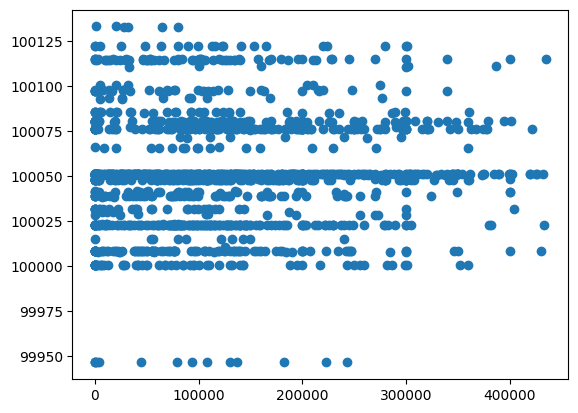

In [64]:
# compare between predictions and real values
svr_predictions = svr_model.predict(X_test)
svr_real_values = np.array(y_test)

plt.scatter(svr_real_values, svr_predictions)

In [65]:
svr_MAE = metrics.mean_absolute_error(y_test, svr_predictions)
print('MAE:', svr_MAE)
svr_MSE = metrics.mean_squared_error(y_test, svr_predictions)
print('MSE:', svr_MSE)
svr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, svr_predictions))
print('RMSE:', svr_RMSE)
svr_R2 = r2_score(y_test, svr_predictions)
print('R^2:', svr_R2)

MAE: 82987.33902923268
MSE: 11432062863.096397
RMSE: 106920.82520770402
R^2: -0.04692350983005822


- Since MSE and MAE is too high the model will gives a bad predictions.
- Since R^2 is negative the Linear Regressom is not good model for the data.

## Compare Models Results

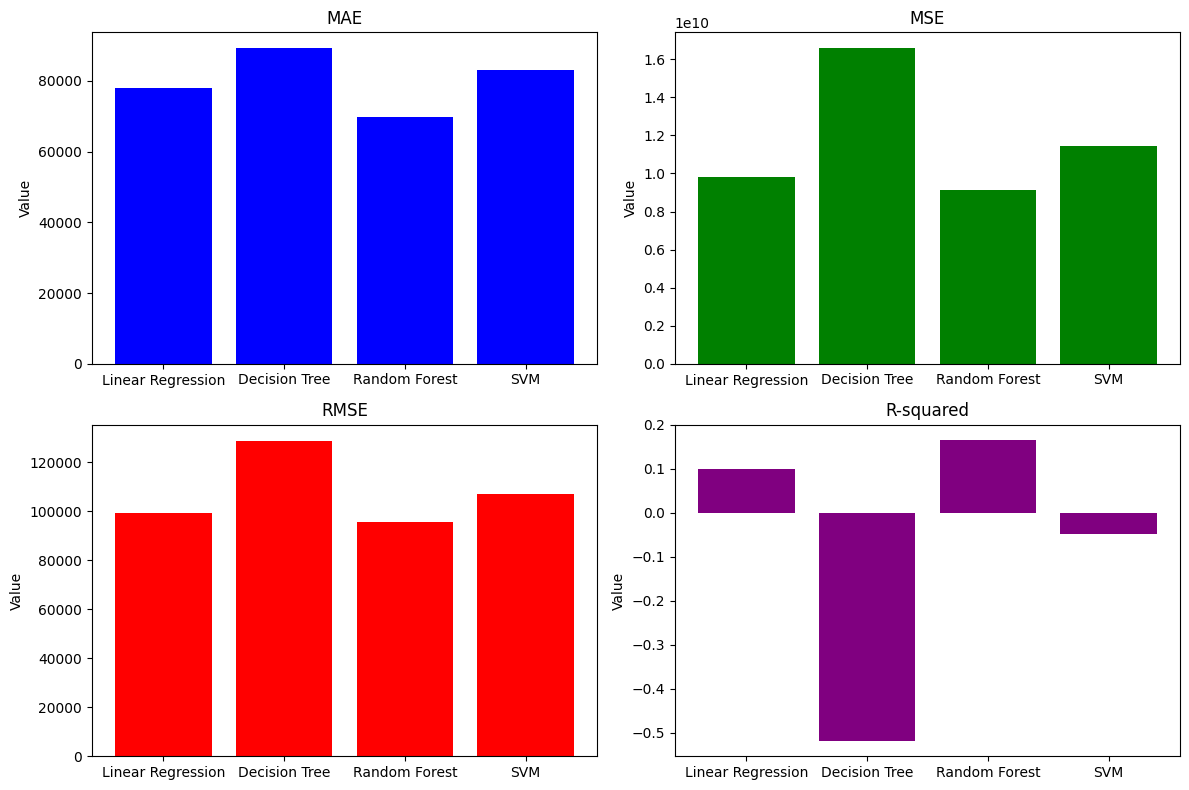

In [66]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM']
mae_values = [lrm_MAE, dtr_MAE, rfm_MAE, svr_MAE]
mse_values = [lrm_MSE, dtr_MSE, rfm_MSE, svr_MSE]
rmse_values = [lrm_RMSE, dtr_RMSE, rfm_RMSE, svr_RMSE]
r2_values = [lrm_R2, dtr_R2, rfm_R2, svr_R2]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axs[0, 0].bar(models, mae_values, color='blue')
axs[0, 0].set_title('MAE')
axs[0, 0].set_ylabel('Value')

axs[0, 1].bar(models, mse_values, color='green')
axs[0, 1].set_title('MSE')
axs[0, 1].set_ylabel('Value')

axs[1, 0].bar(models, rmse_values, color='red')
axs[1, 0].set_title('RMSE')
axs[1, 0].set_ylabel('Value')

axs[1, 1].bar(models, r2_values, color='purple')
axs[1, 1].set_title('R-squared')
axs[1, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

## final conclusion about the models results
##### In Linear Regression, Decision Tree and SVM we find these conclusions:
 - Since MSE, MAE and RMSE is too high the models will give a bad predictions.
 - Since R^2 is negative the models is not good model for the data.

 ##### On the other hand, we found these conclusion in Random Forest:
 - In this model,  MSE and MAE is lower than other models, it will give a better predictions.
- R^2 is not negative, that consider as a good sign.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9bc8be5e-0d82-4705-8ecc-0f2886137bd6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>